# 第13回 機械学習入門4 ニューラルネットワーク



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

## ニューラルネットワークの基礎

[ニューラルネットワークの図](https://drive.google.com/file/d/1Auq-KliiebZpncycYiReBia9y492jHif/view?usp=sharing)

入力（特徴量）と出力（正解）の関係を上図のようなネットワーク構造で表現したものを**ニューラルネットワーク**と呼ぶ。
とくに、上図のように入力から出力に向けて一方向に情報が流れるニューラルネットワークを順伝播型ニューラルネットワークと呼ぶ。
また、ニューラルネットワークやそのバリエーション、それらを解くための方法などを総称して深層学習（ディープラーニング）と呼ぶ。
この授業では順伝播型ニューラルネットワークの基本を概観する。

$l$を層のインデックス、$L$を層数として、最初の層（$l=1$）を入力層、最後の層（$l=L$）を出力層、それ以外を隠れ層と呼ぶ。
層数と各層のユニット数は任意に決めることができる。
第$l$層$i$番目のユニットへの入力を $u_i^{(l)}$，第 $l$ 層 $i$ 番目のユニットからの出力を$z_i^{(l)}$と表す。
入力層 $l=1$ においては $u_i^{(1)}=x_i$ であり、
出力層 $l=L$ においては $z_i^{(L)}=y$ である。多値分類問題の場合には出力層のユニット数は3以上になる。
さらに、第 $l$ 層 $i$ 番目のユニットから第 $(l+1)$ 層 $j$ 番目のユニットへの出力の重みを$w_{ji}^{(l+1)}$、
バイアスを $w_{j0}^{(l+1)}$ と書くことにすれば、

$$ \tag{1}
  u_j^{(l+1)} = w_{j0}^{(l+1)} + \sum_{i}w_{ji}^{(l+1)}z_i^{(l)}
$$

となる。
ここで、$z_j^{(l+1)}=u_j^{(l+1)}$としてしまっては、
入力 $\mathbf{x}$ と出力 $y$ の関係は線形となってしまい、表現力がまったく改善しない。
ニューラルネットワークでは活性化関数と呼ばれる関数 $h^{(l)}$ を用いて

$$ \tag{2}
  z_j^{(l+1)} = h^{(l+1)}\left(u_j^{(l+1)}\right)
$$

とする。
活性化関数としてはシグモイド関数や正規化線形関数 $h(u)=\max\{0,u\}$ などが用いられる。
また、出力層における活性化関数として、回帰では恒等関数 $h(u)=u$を使えばよく、分類ではシグモイド関数（2値分類）やソフトマックス関数（多値分類）を使えばよい。

(1)(2)はまとめて

$$
  \mathbf{z}^{(l+1)}=h^{(l+1)}(\mathbf{u}^{(l+1)}),\
  \mathbf{u}^{(l+1)}=\mathbf{W}^{(l+1)}\mathbf{z}^{(l)},\quad
  l=1,2,\dots,L-1
$$

と書くことができる。
ここで

$$
  \mathbf{W}^{(l+1)} = \left(
  \begin{array}{cccc}
    w_{10}^{(l+1)} & w_{11}^{(l+1)} & w_{12}^{(l+1)} & \ldots \\
    w_{20}^{(l+1)} & w_{21}^{(l+1)} & w_{22}^{(l+1)} & \ldots \\
    \vdots & \vdots & \vdots & \ddots
  \end{array} \right),\
  \mathbf{z}^{(l)} = \left(
  \begin{array}{c}
    1 \\ z_1^{(l)} \\ z_2^{(l)} \\ \vdots
  \end{array}
  \right)
$$

である。

$\mathbf{W}^{(l+1)}$
は $(第 (l+1) 層のユニット数) \times (第 l 層のユニット数 + 1)$行列、
$\mathbf{z}^{(l)}$は
$(第 l 層のユニット数 + 1)$次元ベクトルである。
また、活性化関数 $h^{(l)}$ の引数がベクトル $\mathbf{u}$ のときは
$h^{(l)}(\mathbf{u})=(h^{(l)}(u_1),h^{(l)}(u_2),…)^T$と定義する。
この表記を使うと、入力 $\mathbf{x}$ と出力 $y$ の関係は

$$ \tag{3}
  y = 
  h^{(L)}\left(\mathbf{W}^{(L)}h^{(L-1)}\left(\cdots h^{(3)}\left(\mathbf{W}^{(3)}h^{(2)}\left(\mathbf{W}^{(2)}\mathbf{x}
  \right)\right)\right)\right)
$$

と書ける。
すなわち、入力 $\mathbf{x}$ からスタートして線形変換 $\mathbf{W}^{(l)}$
と活性化関数 $h^{(l)}$ による変換をつぎつぎと作用させて、出力 $y$ に至る。
よって、かなり複雑ではあるが、入力 $\mathbf{x}$ と出力 $y$ の間の関係をパラメータ $\mathbf{w}$ をもつ関数 $f$ を用いて
$y=f(\mathbf{x};\mathbf{w})$
と表現するという機械学習の基本的な考え方は保たれている。

表現力の高い非線形関数 (3) よってモデル化をすることにより、
線形関数では分類できない問題も解ける可能性が出てくる。
あとは、解きたい問題に応じて損失関数

$$
  L(\mathbf{w})= \frac{1}{N}\sum_{i=1}^N l(\mathbf{x}_i, y_i; \mathbf{w})
$$

を定義して、最小化問題 $\min_{\mathbf{w}}L(\mathbf{w})$
を確率的勾配降下法などによって解けばよい。
しかし、ニューラルネットワークにはいくつかの困難がある。

まず、（確率的）勾配降下法には勾配 $\nabla L(\mathbf{w})$ の計算が必要になるが、$\nabla L(\mathbf{w})$ の計算には (3) によって定義される $y$ のパラメータ $w_{ji}$ に関する偏微分
$\partial y/\partial w_{ji}$の計算が必要になる。
単純に数値微分を適用すると、合成関数の微分を何度も繰り返すことになるため、
計算量が莫大になり実用的ではない。
しかし、**誤差逆伝播法**と呼ばれる微分計算がこの問題を解決する。
ニューラルネットワークを含む深層学習が実用化されるようになった理論的背景の一つは誤差逆伝播法の発明とその改良にある。

つぎに、ニューラルネットワークにおける損失関数 $L(\mathbf{w})$ は一般には凸関数にはならないという問題がある。
したがって、確率的勾配降下法を使って $\nabla L(\mathbf{w})=0$ の解を求めたとしても、それが大域的最適解になっている保障はない。

また、ニューラルネットワークでは多くのパラメータを持つ非線形関数により入力 $\mathbf{x}$ と出力 $y$ の関係をモデル化することから、過学習が起こりやすことが容易に想像できる。
したがって、深層学習においては正則化の技術が一層重要となる。

層数や各層のユニット数をいくつにすればよいのかについても一般論は知られていない。数学的には**普遍近似定理**（Cybenko(1989)など）により、隠れ層が1つ（$L=2$）のニューラルネットワークは、隠れ層のユニット数を増やすことにより、任意の連続関数を近似できること、が知られている。しかし、実際には隠れ層のユニット数を増やすよりも、隠れ層の数を増やしたほうが精度が良い場合が多いようだ。

- Cybenko, G. (1989): Approximations by Superpositions of a Sigmoidal Function,. Vol. 2. Mathematics of Control, Signals, and Systems.

このようにさまざまな問題があるにも関わらず、
ニューラルネットワークを含め深層学習が画像認識をはじめさまざまな問題に対して高いパフォーマンスを発揮している。
しかし、なぜ深層学習がそこまでうまく機能するのかについては、理論的にはまだ分かっていないことが多い。


## Kerasによるニューラルネットワークの実装

Kerasライブラリ https://keras.io/ を用いてニューラルネットワークを実装してみる。scikit-learnライブラリにもニューラルネットワークを実装するためのクラスが用意されているが（MLPClassifier, MLPRegressorなど）、柔軟なモデリングはできない。

### 分類（breast_cancerデータ）
Breast Cancerデータ(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) の予測については勾配ブースティング木などで十分な精度は出るが、Kerasの使い方を学ぶため、ニューラルネットワークを用いて分類を行う。

Kerasライブラリのインポート

In [2]:
from tensorflow import keras

scikit-learnからデータをロードする。

In [3]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer(as_frame=True)

特徴量と正解の定義

In [4]:
Xbc = bc.data
ybc = bc.target

In [ ]:
Xbc.shape

(569, 30)

特徴量は30個ある。

訓練データ、検証データ、テストデータに分ける。検証データはハイパーパラメータの決定に使うデータ。

In [5]:
Xbc_train_full, Xbc_test, ybc_train_full, ybc_test = train_test_split(Xbc, ybc, random_state=1)
Xbc_train, Xbc_valid, ybc_train, ybc_valid = train_test_split(Xbc_train_full, ybc_train_full, random_state=1)

特徴量のスケーリング

In [6]:
scaler = StandardScaler()
scaler.fit(Xbc_train)
Xbc_train_scaled = scaler.transform(Xbc_train)
Xbc_valid_scaled = scaler.transform(Xbc_valid)
Xbc_test_scaled = scaler.transform(Xbc_test)

ニューラルネットワークの作成。入力の数は30、出力は1つ。
ここでは隠れ層を1つ作成し、隠れ層のユニット数を100とする。
隠れ層の活性化関数は`relu`とする。出力層の活性化関数は2値分類なので`sigmoid`とする。

In [ ]:
from keras.layers import Dense

In [12]:
model = keras.models.Sequential()
model.add(Dense(100, activation='relu', input_shape=(30,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

モデルのサマリーをみる。

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 13,301
Trainable params: 13,301
Non-trainable params: 0
_________________________________________________________________


モデルのコンパイル。損失関数はバイナリクロスエントロピー（尤度関数の $-log$ をとったもの、第10回講義を参照）。

In [14]:
model.compile(loss='binary_crossentropy',
              metrics=['accuracy'])

モデルの学習と評価

In [15]:
history = model.fit(Xbc_train_scaled, ybc_train, epochs=20, validation_data=(Xbc_valid_scaled, ybc_valid))

Epoch 1/20
10/10 [==============================] - 1s 38ms/step - loss: 0.3705 - accuracy: 0.8746 - val_loss: 0.1762 - val_accuracy: 0.9813
Epoch 2/20
10/10 [==============================] - 0s 11ms/step - loss: 0.1757 - accuracy: 0.9530 - val_loss: 0.1103 - val_accuracy: 0.9813
Epoch 3/20
10/10 [==============================] - 0s 10ms/step - loss: 0.1177 - accuracy: 0.9749 - val_loss: 0.0811 - val_accuracy: 0.9720
Epoch 4/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0893 - accuracy: 0.9781 - val_loss: 0.0720 - val_accuracy: 0.9720
Epoch 5/20
10/10 [==============================] - 0s 12ms/step - loss: 0.0711 - accuracy: 0.9781 - val_loss: 0.0661 - val_accuracy: 0.9720
Epoch 6/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0589 - accuracy: 0.9843 - val_loss: 0.0618 - val_accuracy: 0.9626
Epoch 7/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0493 - accuracy: 0.9875 - val_loss: 0.0637 - val_accuracy: 0.9720
Epoch 8/20
10/

学習曲線を見る。

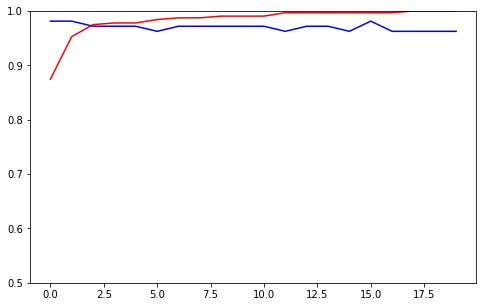

In [16]:
history_data = pd.DataFrame(history.history)
plt.ylim(0.5,1)
history_data['accuracy'].plot(figsize=(8,5), color='r', label='accuracy')
history_data['val_accuracy'].plot(figsize=(8,5), color='b', label='val_accuracy')
plt.show()

モデルの評価

In [17]:
model.evaluate(Xbc_test_scaled, ybc_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.1211 - accuracy: 0.9650


[0.12108062207698822, 0.9650349617004395]

### Fashion MNISTの分類
ニューラルネットワークらしい分類問題としてFashion MINSTデータ（https://keras.io/api/datasets/fashion_mnist/ ）の分類を行う。

データをロードする。

In [18]:
(Xfm_train_full, yfm_train_full), (Xfm_test, yfm_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


特徴量と正解の次元を見ておく。

In [19]:
print(Xfm_train_full.shape)
print(yfm_train_full.shape)

(60000, 28, 28)
(60000,)


特徴量である画像データを見てみる。

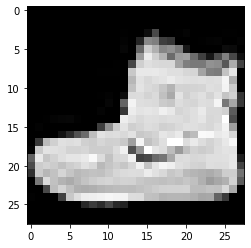

In [20]:
plt.imshow(Xfm_train_full[0,:,:], cmap='gray')

正解は？

In [21]:
yfm_train_full[0]

9

In [22]:
yfm_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

正解を one-hot 形式に変換する。

In [23]:
yfm_train_full = keras.utils.to_categorical(yfm_train_full)
yfm_test = keras.utils.to_categorical(yfm_test)

In [24]:
yfm_train_full

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

訓練データと検証データの作成。

In [25]:
Xfm_train, Xfm_valid, yfm_train, yfm_valid = train_test_split(Xfm_train_full, yfm_train_full, random_state=1)

特徴量のスケーリング。特徴量の各成分は0から255の数値で表される明度なので、255で割って、0から1の数値にスケーリングする。

In [26]:
Xfm_train = Xfm_train / 255
Xfm_valid = Xfm_valid / 255
Xfm_test = Xfm_test / 255

ニューラルネットワークの作成。最初に2次元$(28, 28)$の特徴量を1次元に変換している（`keras.layers.Flatten`）。

In [32]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[28, 28]))
model1.add(Dense(500, activation='relu'))
model1.add(Dense(500, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [28]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 1000)              785000    
                                                                 
 dense_7 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_8 (Dense)             (None, 10)                10010     
                                                                 
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [33]:
model1.compile(loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [34]:
history1 = model1.fit(Xfm_train, yfm_train, epochs=30, validation_data=(Xfm_valid, yfm_valid))

Epoch 1/30
1407/1407 [==============================] - 21s 14ms/step - loss: 0.5309 - accuracy: 0.8102 - val_loss: 0.5431 - val_accuracy: 0.8221
Epoch 2/30
1407/1407 [==============================] - 21s 15ms/step - loss: 0.4232 - accuracy: 0.8522 - val_loss: 0.4080 - val_accuracy: 0.8609
Epoch 3/30
1407/1407 [==============================] - 22s 16ms/step - loss: 0.3945 - accuracy: 0.8635 - val_loss: 0.4624 - val_accuracy: 0.8568
Epoch 4/30
1407/1407 [==============================] - 21s 15ms/step - loss: 0.3794 - accuracy: 0.8703 - val_loss: 0.4005 - val_accuracy: 0.8709
Epoch 5/30
1407/1407 [==============================] - 22s 16ms/step - loss: 0.3677 - accuracy: 0.8770 - val_loss: 0.3983 - val_accuracy: 0.8825
Epoch 6/30
1407/1407 [==============================] - 20s 15ms/step - loss: 0.3537 - accuracy: 0.8800 - val_loss: 0.4306 - val_accuracy: 0.8751
Epoch 7/30
1407/1407 [==============================] - 21s 15ms/step - loss: 0.3455 - accuracy: 0.8853 - val_loss: 0.4708 -

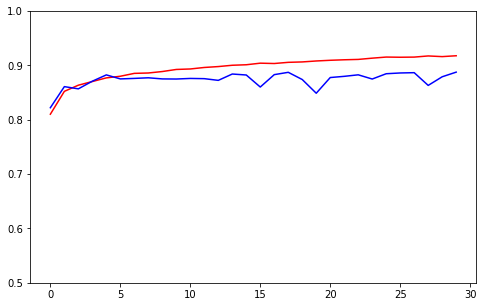

In [35]:
history1_data = history1.history
plt.figure(figsize=(8, 5))
plt.ylim(0.5, 1)
plt.plot(history1_data['accuracy'], color='r', label='accuracy')
plt.plot(history1_data['val_accuracy'], color='b', label='val_accuracy')
plt.show()

In [36]:
model1.evaluate(Xfm_test, yfm_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7899 - accuracy: 0.8794


[0.7899182438850403, 0.8794000148773193]

### 回帰（California Housing データセット）
ニューラルネットワークは回帰問題を扱うこともできる。モデルのコンパイルをする際に損失関数（`loss`オプション）を回帰向けのものにすればよいだけである。California Housing データセットを用いて住宅価格の予測を行う。

データをロードする。

In [37]:
from sklearn.datasets import fetch_california_housing
cal = fetch_california_housing()
Xcal = cal.data
ycal = cal.target

In [38]:
print(cal.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

訓練データ、検証データ、テストデータに分ける。

In [39]:
Xcal_train_full, Xcal_test, ycal_train_full, ycal_test = train_test_split(Xcal, ycal, random_state=1)
Xcal_train, Xcal_valid, ycal_train, ycal_valid = train_test_split(Xcal_train_full, ycal_train_full, random_state=1)

特徴量のスケーリング。

In [40]:
scaler2 = StandardScaler()
scaler2.fit(Xcal_train)
Xcal_train_scaled = scaler2.transform(Xcal_train)
Xcal_test_scaled = scaler2.transform(Xcal_test)
Xcal_valid_scaled = scaler2.transform(Xcal_valid)

モデルの構築。回帰問題なので出力層の活性化関数は恒等関数（`linear` または何も指定しなくてよい）。

In [47]:
model2 = keras.models.Sequential()
model2.add(Dense(100, activation='relu', input_shape=(8,)))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(1, activation='linear'))

モデルのコンパイル。損失関数には平均二乗誤差を使う。

In [48]:
model2.compile(loss='mean_squared_error')

In [49]:
history2 = model2.fit(Xcal_train_scaled, ycal_train, epochs=30, validation_data=(Xcal_valid_scaled, ycal_valid))

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 0.6591 - val_loss: 0.4013
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4082 - val_loss: 0.3609
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3872 - val_loss: 0.3564
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3685 - val_loss: 0.3448
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3572 - val_loss: 0.3286
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3465 - val_loss: 0.3379
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3541 - val_loss: 0.3264
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3194 - val_loss: 0.3136
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3494 - val_loss: 0.3055
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3045 - val_loss: 0.3315

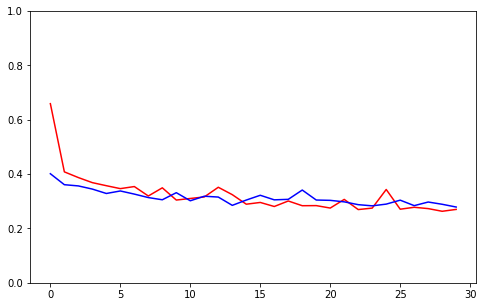

In [50]:
history2_data = pd.DataFrame(history2.history)
plt.ylim(0,1)
history2_data['loss'].plot(figsize=(8,5), color='r', label='mse')
history2_data['val_loss'].plot(figsize=(8,5), color='b', label='val_mse')
plt.show()

## オプション価格付けへの応用

ニューラルネットワークをオプション価格付けに応用する試みは以下の論文など古くから試みられている。
- J. M. Hutchinson, A. W. Lo, and T. Poggio. A nonparametric approach to pricing and hedging
derivative securities via learning networks. Journal of Finance, 49(3):851–889, 1994.

最近の研究については以下の文献などを参照。
- J. Hull. "Machine Learning in Business: An Introduction to the World of Data Science". Amazon Fulfillment Poland Sp. 2021
- J. Ruf and W. Wang. "Neural networks for option pricing and hedging: a literature review". Journal of Computational Finance, 21(1):1–46, 2020.
- Buehler, H., L. Gonon, J. Teichmann, and B. Wood. "Deep hedging", Quantitative Finance, 19, 1271–91. 2019.

機械学習のファイナンスへの応用は以下の文献など。
-  M. López de Prado.
  "Advances in Financial Machine Learning".,
  John Wiley & Sons, 2018. 
  （日本語訳: 長尾慎太郎, 鹿子木亨紀（監訳）. 「ファイナンス機械学習―金融市場分析を変える機械学習アルゴリズムの理論と実践」, きんざい, 2019.）
- 参考書（Pythonによるファイナンス）第15, 16章


Black-Scholes公式によればヨーロピアンコールオプションに対する価格$C$は以下で与えられる。

\begin{align}
  C &= SN(d_1) - Ke^{-rT}N(d_2)\\
  d_1 &= \frac{\ln(S/K) + (r + \sigma^2/2)T}{\sigma\sqrt{T}}\\
  d_2 &= d_1 - \sigma\sqrt{T}
\end{align}

BS公式が前提とする仮定の元ではオプション価格は$S$, $K$, $T$, $r$, $\sigma$の関数で与えられる。
BS公式のように価格が市場パラメータの陽関数で与えられる場合もあれば、
仮定するモデルによっては
モンテカルロシミュレーションにより価格を求めざるを得ない場合もある。
いずれにせよ、オプション価格を求めるということは、さまざまなパラメータとオプション価格の関係を（それが陽関数で表現できるかどうかは別として）求めることに他ならない。そうすると、オプション価格付け問題を、オプション価格を正解、その他の市場データやオプション契約のパラメータを特徴量とした教師あり学習とみなすことができるだろう。

ここではオプションの市場データをニューラルネットワークにより学習させることを試みる。

データ `call2018.csv` を読み込む。

In [51]:
call_df = pd.read_csv('')

In [54]:
call_df.head()

,Trade_Date,Close_Price,Trade_Volume,TTM,Exercise_Price,Spot,vol,rf
0,20180104,2350,4,0.021918,21000,23506.33,0.12682,-0.00047
1,20180104,1850,4,0.021918,21500,23506.33,0.12682,-0.00047
2,20180104,1510,4,0.021918,21875,23506.33,0.12682,-0.00047
3,20180104,1470,10,0.021918,22000,23506.33,0.12682,-0.00047
4,20180104,580,5,0.021918,22250,23506.33,0.12682,-0.00047


正解と特徴量を生成。

In [55]:
Xop_df = call_df[['Spot', 'Exercise_Price', 'TTM', 'rf', 'vol']]
yop_df = call_df['Close_Price']
Xop_np = Xop_df.to_numpy()
yop_np = yop_df.to_numpy()

In [56]:
Xop_df.head()

,Spot,Exercise_Price,TTM,rf,vol
0,23506.33,21000,0.021918,-0.00047,0.12682
1,23506.33,21500,0.021918,-0.00047,0.12682
2,23506.33,21875,0.021918,-0.00047,0.12682
3,23506.33,22000,0.021918,-0.00047,0.12682
4,23506.33,22250,0.021918,-0.00047,0.12682


訓練データ、検証データ、テストデータに分ける。`train_test_split`は使わない。

In [57]:
# 1〜16852を訓練データ、16853〜21028を検証データ、21029以降をテストデータ
# valid_index = 16853
Xop_train = Xop_np[:16853,:]
Xop_valid = Xop_np[16853:21029,:]
Xop_test = Xop_np[21029:,:]

yop_train = yop_np[:16853]
yop_valid = yop_np[16853:21029]
yop_test = yop_np[21029:]

特徴量のスケーリング

In [58]:
scaler3 = StandardScaler()
scaler3.fit(Xop_train)
Xop_train_scaled = scaler3.transform(Xop_train)
Xop_valid_scaled = scaler3.transform(Xop_valid)
Xop_test_scaled = scaler3.transform(Xop_test)

In [59]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Dense(100, activation='relu', input_shape=Xop_train.shape[1:]))
model3.add(keras.layers.Dense(100, activation='relu'))
model3.add(keras.layers.Dense(1))

In [60]:
model3.compile(loss='mean_squared_error')
history3 = model3.fit(Xop_train_scaled, yop_train, epochs=30, validation_data=(Xop_valid_scaled, yop_valid))

Epoch 1/30
527/527 [==============================] - 2s 2ms/step - loss: 305014.2812 - val_loss: 141224.4062
Epoch 2/30
527/527 [==============================] - 1s 2ms/step - loss: 133944.6562 - val_loss: 54574.0352
Epoch 3/30
527/527 [==============================] - 1s 2ms/step - loss: 58727.7266 - val_loss: 25327.7012
Epoch 4/30
527/527 [==============================] - 1s 2ms/step - loss: 27438.5371 - val_loss: 13440.3740
Epoch 5/30
527/527 [==============================] - 1s 2ms/step - loss: 13415.7061 - val_loss: 9360.9033
Epoch 6/30
527/527 [==============================] - 1s 2ms/step - loss: 7543.5693 - val_loss: 8070.0957
Epoch 7/30
527/527 [==============================] - 1s 2ms/step - loss: 5217.7715 - val_loss: 6844.0283
Epoch 8/30
527/527 [==============================] - 1s 2ms/step - loss: 4059.5000 - val_loss: 6423.1079
Epoch 9/30
527/527 [==============================] - 1s 2ms/step - loss: 3626.9592 - val_loss: 6406.7422
Epoch 10/30
527/527 [=============

In [61]:
model3.evaluate(Xop_test_scaled, yop_test)

163/163 [==============================] - 0s 1ms/step - loss: 3396.0107


3396.0107421875

BSモデルによる誤差の計算。まず、BS公式を定義。

In [62]:
from math import log, sqrt, pi, exp
from scipy.stats import norm

def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2*0.5)*T)/(sigma*sqrt(T))
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)
def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))

def bs_call_value(X): # X: DataFrame
  datasize = X.shape[0]
  call_value = np.empty(datasize)
  for i in range(0, datasize):
    call_value[i] = bs_call(X[i,0], X[i,1], X[i,2], X[i,3], X[i,4])
  return call_value

平均二乗誤差を計算する。

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
bs = bs_call_value(Xop_test)

In [65]:
print(mean_squared_error(yop_test, bs))

35740.772542092855


この手法を使えば、特徴量をBS公式の入力（$S, K, T, r, \sigma$）に限定する必要はなく、他の市場データを特徴量に入れることもできる。

## ノーフリーランチ定理

ここまでいくつかの機械学習のアルゴリズムを紹介してきた。
この授業で紹介したアルゴリズム以外にもさまざまなものが知られており、
同じ問題に対して複数のアルゴリズムが適用できる場合はたくさんある。
では、結局どのアルゴリズムを用いるのが一番よいのだろうか。
Wolpert (1996)やWolpert and Macready (1997)によるノーフリーランチ定理を紹介する。
これらの論文の記述は数学的であるが、簡単に述べれば以下を主張している。

- データに関して何の前提条件も設けなければ、あらゆる問題について最高のパフォーマンスをもつアルゴリズムは存在しない

つぎのように言い換えることもできる。

- アルゴリズムAがある問題について最もよいパフォーマンスをもっていたとしても、
それとは別の問題が存在して、そこでは別のアルゴリズムBがアルゴリズムAよりよいパフォーマンスをもつ

すなわち、あらゆる問題を効率的に解く万能なアルゴリズムは存在しないということである。したがって、機械学習においてはデータや問題の特性にあわせたアルゴリズムを選択することが重要ということになる。

- Wolpert, D. H., and W. G. Macready. (1997): “No free lunch theorems for optimization,” IEEE Transactions on Evolutionary Computation, 1, 67–82.
- Wolpert, D. H. (1996): “The Lack of A Priori Distinctions Between Learning Algorithms,” Neural computation, 8, 1341–90.